# 《数据采集与清洗》
## 第一次作业内容： 网页抓取
### 具体目标：
+ 用``urllib.requests``库发起一次``get``请求，输出``response``文本信息；
+ 用``Requests``库伪装成火狐浏览器发起一次``post``请求，输出``response``文本信息；
+ 用``Requests``库中的``session``对象发出``get``请求，设置``cookies``并获取，输出获取的``cookies``内容；
+ 实现抓取网页的不去重深度遍历算法，自选合适的种子网站和相关参数，输出结果；
+ 编写抓取网页的广度遍历算法（含去重和不去重），自选合适的种子网站和相关参数，输出结果；
+ (选)将抓取网页的去重深度遍历算法封装成对象（类），并测试。

### 注：
+ 代码要有注释，结果要有分析；
+ 本次作业提交截至时间：2020年3月10日(星期二)；
+ 文件命名规则: 班级号+学号+姓名+作业序号，示例：``1_20188989899_张三_1``；
+ 提交方式：1班发送至邮箱：632994085@qq.com；2班发送至邮箱：786888939@qq.com.

### 问题1：用``urllib.requests``库发起一次``get``请求，输出``response``文本信息。

In [25]:
import urllib.request
response = urllib.request.urlopen('https://www.taptap.com/')

200
<!DOCTYPE html>
<html>
    <head>
    <meta charset="utf-8">
    <meta name="renderer" content="webkit">
    <meta name="force-rendering" content="webkit">
    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
    <meta name="theme-color" content="#009BAA" />
                <title>TapTap | 发现好游戏</title>
    <meta name="keywords" content="TapTap,TapTap官方网站,手机游戏社区,正版手游下载,好玩的手游,Google Play游戏排行榜,iOS游戏排行榜,安卓免费游戏,安卓游戏排行榜">
    <meta name="description" content="TapTap是一个推荐高品质手游的手游分享社区，实时同步全球各大应用市场游戏排行榜，与全球玩家共同交流并发掘高品质手游。每一款推荐游戏，都是由专业的测评团队从全球海量的游戏中精选而出，只为你提供好玩的手机游戏。">
        <link rel="search" type="application/opensearchdescription+xml" href="https://www.taptap.com/opensearch-v2.xml" title="TapTap">
    <meta name="apple-itunes-app" content="app-id=1444595166">
      <link rel="canonical" href="https://www.taptap.com" />
    <meta name="csrf-token" content="1oTTIrquxLHfnUcBILGFQZhOZeUhP2j1PRppaFln">
    <meta name="cookie-domain" content="www.taptap.com">
                  
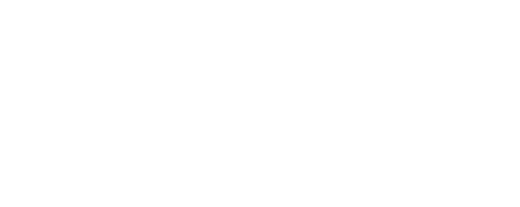
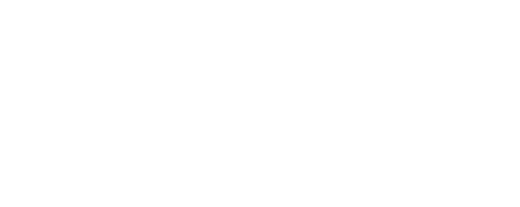
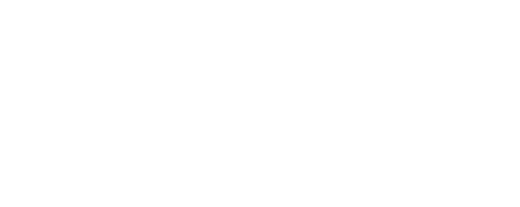
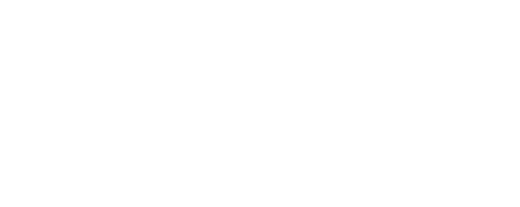
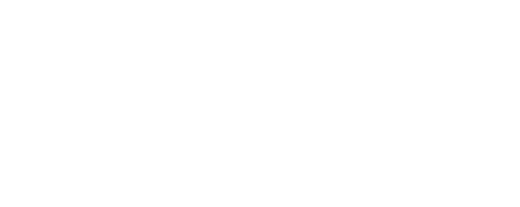
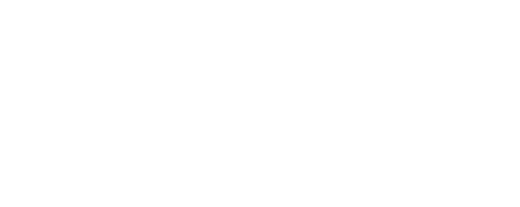
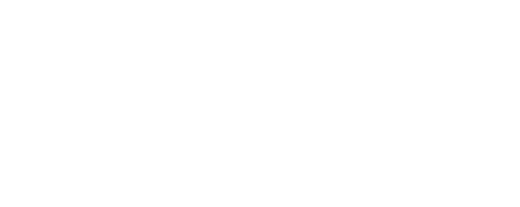
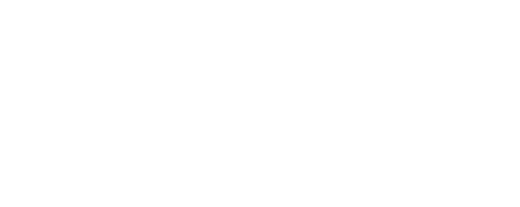
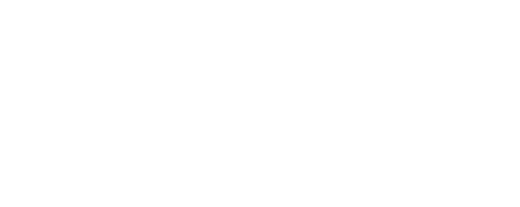

In [4]:
print(response.code)
print(response.read().decode('utf-8'))

这里对结果进行分析。

### 用``Requests``库伪装成火狐浏览器发起一次``post``请求，输出``response``文本信息。

In [26]:
import requests
fake_headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.79 Safari/537.36'
}  
response = requests.post("https://www.taptap.com",headers = fake_headers)

In [6]:
print(response.status_code)
print(response.content.decode('utf-8'))

405
<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <title>405</title>

    <link rel="shortcut icon" href="/favicon.ico"/>

    <link rel="apple-touch-icon" sizes="60x60" href="https://assets.tapimg.com/img/touch-icon-iphone.png">
    <link rel="apple-touch-icon" sizes="76x76" href="https://assets.tapimg.com/img/touch-icon-ipad.png">
    <link rel="apple-touch-icon" sizes="120x120" href="https://assets.tapimg.com/img/touch-icon-iphone-retina.png">
    <link rel="apple-touch-icon" sizes="152x152" href="https://assets.tapimg.com/img/touch-icon-ipad-retina.png">

    <link href="https://assets.tapimg.com/style/base.css" rel="stylesheet">
    <link href="https://assets.tapimg.com/css/app-e1f6fe0ab9.css" rel="stylesheet">

    <!--[if lt IE 9]>
    <script src="https://assets.tapimg.com/scripts/html5shiv.min.js"></script>
    <script src="https://a

这里对结果进行分析。

### 用``Requests``库中的``session``对象发出``get``请求，设置``cookies``并获取，输出获取的``cookies``内容。 

In [28]:
import requests
http_session = requests.session()
response = http_session.get("https://www.taptap.com")

In [8]:
http_session.cookies   #获取当前的cookies

<RequestsCookieJar[Cookie(version=0, name='XSRF-TOKEN', value='eyJpdiI6InlqdEV5ZWxDQXQrMFd4UVJjQzNwNFE9PSIsInZhbHVlIjoic1c2d1FPY1ZcL2d2Ukk2dkQzZzdkc3Q2M1F6M0RHK1NxcHBaRjh4M1ZsMjVWcFFxcWwyc2NEdXNYNXQ5YllKeHVNTDZsVklSZ2gwUUluXC9jRTNVUkYxdz09IiwibWFjIjoiZGUzZGI1N2UzZmFiMjdmYTMwMDIwYmZkNmRmYmMxYThiZmJhZDk4NjcwZmRiZGNkYzgzOThhYTNkNTI0NGVhNSJ9', port=None, port_specified=False, domain='www.taptap.com', domain_specified=False, domain_initial_dot=False, path='/', path_specified=True, secure=False, expires=1583856877, discard=False, comment=None, comment_url=None, rest={}, rfc2109=False), Cookie(version=0, name='acw_tc', value='2760828615838280775093435eccad172c970f1577fc6675d4611b68661f82', port=None, port_specified=False, domain='www.taptap.com', domain_specified=False, domain_initial_dot=False, path='/', path_specified=True, secure=False, expires=1586506478, discard=False, comment=None, comment_url=None, rest={'HttpOnly': None}, rfc2109=False), Cookie(version=0, name='tap_sess', value='eyJpd

200
<!DOCTYPE html>
<html>
    <head>
    <meta charset="utf-8">
    <meta name="renderer" content="webkit">
    <meta name="force-rendering" content="webkit">
    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
    <meta name="theme-color" content="#009BAA" />
                <title>TapTap | 发现好游戏</title>
    <meta name="keywords" content="TapTap,TapTap官方网站,手机游戏社区,正版手游下载,好玩的手游,Google Play游戏排行榜,iOS游戏排行榜,安卓免费游戏,安卓游戏排行榜">
    <meta name="description" content="TapTap是一个推荐高品质手游的手游分享社区，实时同步全球各大应用市场游戏排行榜，与全球玩家共同交流并发掘高品质手游。每一款推荐游戏，都是由专业的测评团队从全球海量的游戏中精选而出，只为你提供好玩的手机游戏。">
        <link rel="search" type="application/opensearchdescription+xml" href="https://www.taptap.com/opensearch-v2.xml" title="TapTap">
    <meta name="apple-itunes-app" content="app-id=1444595166">
      <link rel="canonical" href="https://www.taptap.com" />
    <meta name="csrf-token" content="vawIh9KPi3daR1Vu33iZIBCTaoBzTUGB3tg4YJvm">
    <meta name="cookie-domain" content="www.taptap.com">
                  
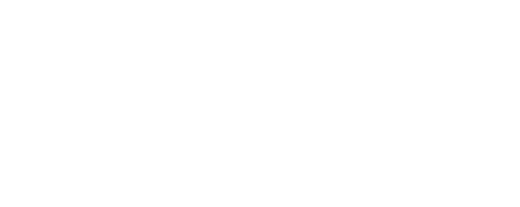
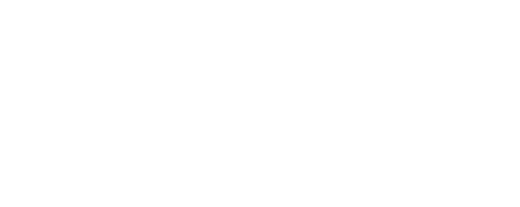
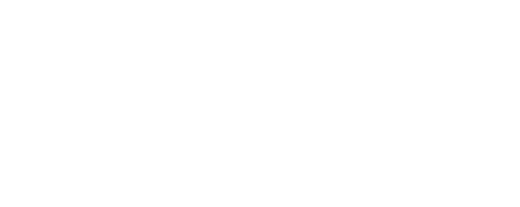
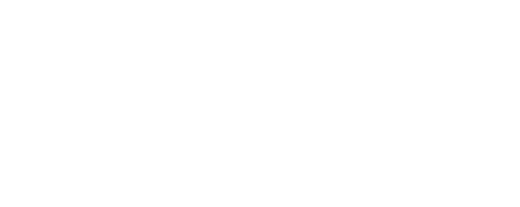
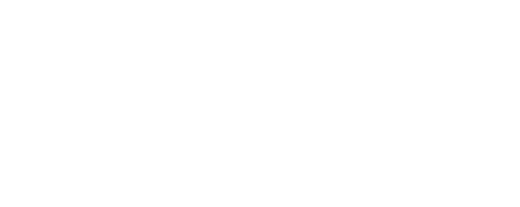
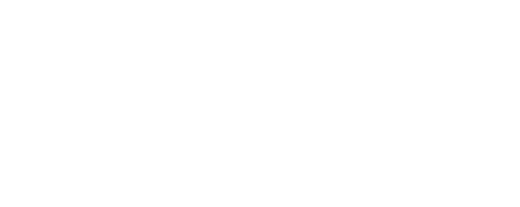
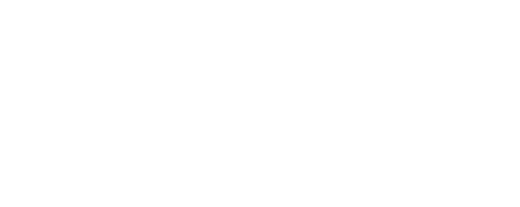
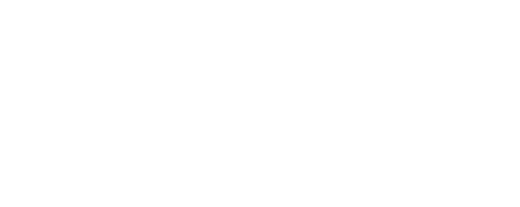
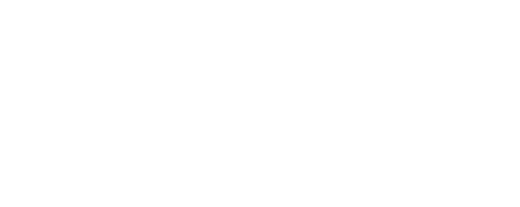

In [9]:
print(response.status_code)
print(response.content.decode('utf-8'))

这里对结果进行分析。

### 实现抓取网页的不去重深度遍历算法，自选合适的种子网站和相关参数，输出结果。


In [29]:
import requests
import re
init_url = "https://www.douyu.com/"
r = re.compile(r'href=[\'"]?(http[^\'" >]+)')
stack = [init_url]
maxnum = 5  #设置最大爬取限制
used =[]   # 保存访问的网址

while len(stack) > 0 and maxnum > 0: #利用深度优先遍历找出所有url（不去重）
    try:
        url = stack.pop(-1)             #这二步就与maxnum挂钩了
        html = requests.get(url).text         
        used.append(url)               # 将已经抓取过的URL存入used集合中
        new_urls = r.findall(html)     # re的方法，将该网站上所有的有关于http开头的url找到并作为列表存储
        for new_url in new_urls:      # 将该网页上抓取的URL添加到stack中
            if new_url not in stack:  # 栈里面已经存在的    
                stack.append(new_url)
        maxnum -= 1
    except Exception as e:
        print(url)
        print(e)
        maxnum -= 1
    

In [18]:
print(used)

['https://www.douyu.com/', 'http://www.douyu.com/client', 'https://zhaopin.douyu.com', 'https://www.douyu.com/cms/zhibo/201803/12/7339.shtml', 'https://www.douyu.com/member/oauth/signin/weixin']


这里对结果进行分析。

### 编写抓取网页的广度遍历算法（含去重和不去重），自选合适的种子网站和相关参数，输出结果。 

In [19]:
import requests
import re
init_url = "https://www.douyu.com/"
r = re.compile(r'href=[\'"]?(http[^\'" >]+)')
queue = [init_url]
used = set() # 利用hash消除已重复链接
maxnum = 5

while len(queue) > 0 and maxnum > 0: #利用广度优先遍历找出所有不重复url
    try:
        url = queue.pop(0)
        html = requests.get(url).text         
        used.add(url) # 将已经抓取过的URL存入used集合中
        new_urls = r.findall(html)
        for new_url in new_urls:
            if new_url not in used and new_url not in queue:
                queue.append(new_url)
        maxnum -= 1
    except Exception as e:
        print(url)
        print(e)
        maxnum -= 1

In [31]:
import requests
import re
init_url = "https://www.douyu.com/"
r = re.compile(r'href=[\'"]?(http[^\'" >]+)')
queue = [init_url]
used = []
maxnum = 5

while len(queue) > 0 and maxnum > 0: #利用广度优先遍历找出所有url
    try:
        url = queue.pop(0)   
        html = requests.get(url).text         
        used.append(url) # 将已经抓取过的URL存入used集合中
        new_urls = r.findall(html)
        for new_url in new_urls:      # 将该网页上新发新未抓取的URL添加到queue中
            if new_url not in queue:
                queue.append(new_url)
        maxnum -= 1
    except Exception as e:
        print(url)
        print(e)
        maxnum -= 1

In [21]:
print(used)

['https://www.douyu.com/', 'https://www.douyu.com', 'https://shark2.douyucdn.cn/front-publish/home-h5-master/css/h5_4545200.css', 'https://shark2.douyucdn.cn/front-publish/live-master/css/home/home_387615b.css', 'https://shark2.douyucdn.cn/front-publish/live-master/css/home/pre-style-main~31ecd969_b8d470f.css']


这里对结果进行分析。

### (选)将抓取网页的去重深度遍历算法封装成对象（类），并测试。 

In [32]:
# 这里编写代码
import requests
import re
class Climb_web:
    """
    3月5日新编读取url
    """
    def __init__(self,url):
        self.url = url
    
    def get_url_html(self,fake_headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.79 Safari/537.36'
    } ):

        response = requests.get(self.url,headers=fake_headers)
        return response.content.decode('utf-8')
        
    def get_all_url(self,maxnum): 
        """
        得到网页上指定规模内以href为标签，http开头的网址（广度优先遍历）
        """
        r = re.compile(r'href=[\'"]?(http[^\'" >]+)')
        queue = [self.url]
        used = set() # 利用hash消除已重复链接

        while len(queue) > 0 and maxnum > 0: #利用广度优先遍历找出所有不重复url
            try:
                url = queue.pop(0)
                html = requests.get(url).text         
                used.add(url) # 将已经抓取过的URL存入used集合中
                new_urls = r.findall(html)
                for new_url in new_urls:
                    if new_url not in used and new_url not in queue:
                        queue.append(new_url)
                maxnum -= 1
            except Exception as e:
                print(url)
                print(e)
                maxnum -= 1
        return list(used)

In [33]:
a = Climb_web("https://www.douyu.com/")
a.get_all_url(2)

['https://www.douyu.com', 'https://www.douyu.com/']

这里对结果进行分析。